In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from pandas import DataFrame
from datetime import datetime
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers import Conv1D, MaxPooling1D ,AveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras import backend as K

# input file path
workdir = "E://Ronny_TF//200914_reupload//Dataset//Scenario4_EC-11K"
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

Using TensorFlow backend.


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


# 출처: https://3months.tistory.com/206 [Deep Play]

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8556802899892615531
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8267812044
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3539477477785608252
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [3]:
# input and index file
dataset = np.load(workdir + "//200914_EC11K.npz")
ss0 = np.load(workdir + '//200914_EC11K_r0_9_1.npz')

In [4]:
# input and index file assign
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [5]:
# training and test dataset assign
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]


In [6]:
# In[15]:
ab =[]
for i in range(100,300):
    ab.append(len(training_image_array) % i)
    
print(min(ab), ab.index(min(ab)))

0 42


In [7]:
# checking the size of dataset
x.shape

(11360, 18988)

In [8]:
# checking the size of training set
training_image_array.shape

(10224, 18988)

In [9]:
# hyperparameters of this model
num_classes = 1
learning_rate = 0.0002
training_epochs = 150
batch_size = 100


In [10]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array




In [11]:
# data shaping for ResNet model
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1],1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1],1)
#input_shape = (img_rows, img_cols, 1)

In [12]:
# data shape
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(10224, 18988, 1) (10224,) (1136, 18988, 1) (1136,)


In [13]:
# defining of data type
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (10224, 18988, 1)
10224 train samples
1136 test samples


In [14]:
training_image_array.shape

(10224, 18988)

In [15]:
# model architecture
with K.tf.device('/GPU:0'):
    inputs = Input(shape=(train_X.shape[1],1),name='inputs')

    x = Conv1D(16, kernel_size=3, strides=2, padding="same")(inputs)
    x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
#     y = x
    x = Activation('tanh')(x)

    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)

    
    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)
    
    
    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    
    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)
    
    x = Conv1D(32, kernel_size=3, strides=2, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
#     x = BatchNormalization()(x)
        
    x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)
    
        
    x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)

    x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)

    x = Conv1D(64, kernel_size=3, strides=2, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
#     x = BatchNormalization()(x)
        
    x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)
    
        
    x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)

    x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)

#     x = AveragePooling1D(pool_size=8)(x)
    x = Flatten()(x)
    x = Dense(units=2048, name='dense1'  ) (x)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name='dropout1') (x)
    x = Activation('relu')(x)

#    x = Reshape((300,1))(x)

#    x = Conv1D(30, kernel_size=150, strides=1, activation = 'relu')(x)
#    x = MaxPooling1D(pool_size=2)(x)
#    x = BatchNormalization()(x)

    x = Dense(units=1024, name='dense5'  ) (x)
    x = BatchNormalization()(x)
    y = x
    x = Dropout(0.1, name='dropout5') (x)
    x = Activation('relu')(x)

    x = Dense(units=512, name='dense6'  ) (x)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name='dropout6') (x)
    x = Activation('relu')(x)

    x = Dense(units=1024, name='dense7'  ) (x)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name='dropout7') (x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)
    
    x = Dense(units=512, name='dense8'  ) (x)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name='dropout8') (x)
    x = Activation('relu')(x)
    
    x = Dense(units=256, name='dense9'  ) (x)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name='dropout9') (x)
    x = Activation('relu')(x)

    x = Dense(units=128, name='dense10'  ) (x)
    x = BatchNormalization()(x)
    y = x
    x = Dropout(0.1, name='dropout10') (x)
    x = Activation('relu')(x)


    predictions = Dense(1, activation='linear', name='predictions', kernel_initializer='he_normal')(x)
#     predictions = Dense(1, activation='linear', name='predictions')(x)

    

    model = Model(inputs=inputs, outputs=predictions, name='Test_v2_DNN20190327')
    model.compile(loss=keras.losses.mean_squared_error,
                  optimizer=keras.optimizers.Adam(learning_rate),
                  metrics=['mse','mae'])



W0915 14:04:44.273862 10444 deprecation_wrapper.py:119] From c:\users\a\anaconda3\envs\tf_gpu_3.6\lib\site-packages\keras\backend\tensorflow_backend.py:514: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0915 14:04:44.276791 10444 deprecation_wrapper.py:119] From c:\users\a\anaconda3\envs\tf_gpu_3.6\lib\site-packages\keras\backend\tensorflow_backend.py:71: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0915 14:04:44.277768 10444 deprecation_wrapper.py:119] From c:\users\a\anaconda3\envs\tf_gpu_3.6\lib\site-packages\keras\backend\tensorflow_backend.py:4076: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0915 14:04:44.359780 10444 deprecation_wrapper.py:119] From c:\users\a\anaconda3\envs\tf_gpu_3.6\lib\site-packages\keras\backend\tensorflow_backend.py:3900: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0915 14:04:44.409554 10444 dep

In [16]:
# model architecture
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             (None, 18988, 1)     0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 9494, 16)     64          inputs[0][0]                     
__________________________________________________________________________________________________
max_pooling1d_1 (MaxPooling1D)  (None, 1898, 16)     0           conv1d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 1898, 16)     64          max_pooling1d_1[0][0]            
__________________________________________________________________________________________________
activation

In [17]:
# model fitting
StartTime8 = datetime.now()
print("StartTime :", StartTime8)
with K.tf.device('/GPU:0'):
    model_train = model.fit(train_X, training_label_array, batch_size=batch_size,epochs=training_epochs,verbose=1,
                        validation_data=(test_X, test_label_array))

EndTime8 = datetime.now()
print("EndTime :", EndTime8)

StartTime : 2020-09-15 14:04:46.502070
Train on 10224 samples, validate on 1136 samples
Epoch 1/150
10224/10224 [==============================] - 24s 2ms/step - loss: 4.8861 - mean_squared_error: 4.8861 - mean_absolute_error: 1.7293 - val_loss: 4.6731 - val_mean_squared_error: 4.6731 - val_mean_absolute_error: 1.5955
Epoch 2/150
10224/10224 [==============================] - 14s 1ms/step - loss: 4.4464 - mean_squared_error: 4.4464 - mean_absolute_error: 1.6146 - val_loss: 4.2377 - val_mean_squared_error: 4.2377 - val_mean_absolute_error: 1.5444
Epoch 3/150
10224/10224 [==============================] - 14s 1ms/step - loss: 4.3236 - mean_squared_error: 4.3236 - mean_absolute_error: 1.5856 - val_loss: 4.2055 - val_mean_squared_error: 4.2055 - val_mean_absolute_error: 1.5627
Epoch 4/150
10224/10224 [==============================] - 14s 1ms/step - loss: 4.2418 - mean_squared_error: 4.2418 - mean_absolute_error: 1.5726 - val_loss: 4.1123 - val_mean_squared_error: 4.1123 - val_mean_absolut

Epoch 36/150
10224/10224 [==============================] - 14s 1ms/step - loss: 3.8821 - mean_squared_error: 3.8821 - mean_absolute_error: 1.5184 - val_loss: 3.8688 - val_mean_squared_error: 3.8688 - val_mean_absolute_error: 1.5367
Epoch 37/150
10224/10224 [==============================] - 14s 1ms/step - loss: 3.8757 - mean_squared_error: 3.8757 - mean_absolute_error: 1.5139 - val_loss: 3.8851 - val_mean_squared_error: 3.8851 - val_mean_absolute_error: 1.5371
Epoch 38/150
10224/10224 [==============================] - 14s 1ms/step - loss: 3.8950 - mean_squared_error: 3.8950 - mean_absolute_error: 1.5244 - val_loss: 3.8645 - val_mean_squared_error: 3.8645 - val_mean_absolute_error: 1.5168
Epoch 39/150
10224/10224 [==============================] - 14s 1ms/step - loss: 3.8840 - mean_squared_error: 3.8840 - mean_absolute_error: 1.5140 - val_loss: 3.8719 - val_mean_squared_error: 3.8719 - val_mean_absolute_error: 1.5102
Epoch 40/150
10224/10224 [==============================] - 14s 1ms/

10224/10224 [==============================] - 14s 1ms/step - loss: 3.8466 - mean_squared_error: 3.8466 - mean_absolute_error: 1.5135 - val_loss: 3.8543 - val_mean_squared_error: 3.8543 - val_mean_absolute_error: 1.5115
Epoch 72/150
10224/10224 [==============================] - 14s 1ms/step - loss: 3.8486 - mean_squared_error: 3.8486 - mean_absolute_error: 1.5094 - val_loss: 3.8682 - val_mean_squared_error: 3.8682 - val_mean_absolute_error: 1.5123
Epoch 73/150
10224/10224 [==============================] - 14s 1ms/step - loss: 3.8633 - mean_squared_error: 3.8633 - mean_absolute_error: 1.5133 - val_loss: 3.8578 - val_mean_squared_error: 3.8578 - val_mean_absolute_error: 1.5258
Epoch 74/150
10224/10224 [==============================] - 14s 1ms/step - loss: 3.8528 - mean_squared_error: 3.8528 - mean_absolute_error: 1.5118 - val_loss: 3.8481 - val_mean_squared_error: 3.8481 - val_mean_absolute_error: 1.5207
Epoch 75/150
10224/10224 [==============================] - 14s 1ms/step - loss: 

10224/10224 [==============================] - 14s 1ms/step - loss: 3.8452 - mean_squared_error: 3.8452 - mean_absolute_error: 1.5016 - val_loss: 3.8611 - val_mean_squared_error: 3.8611 - val_mean_absolute_error: 1.5441
Epoch 107/150
10224/10224 [==============================] - 14s 1ms/step - loss: 3.8383 - mean_squared_error: 3.8383 - mean_absolute_error: 1.5113 - val_loss: 3.8835 - val_mean_squared_error: 3.8835 - val_mean_absolute_error: 1.5088
Epoch 108/150
10224/10224 [==============================] - 14s 1ms/step - loss: 3.8237 - mean_squared_error: 3.8237 - mean_absolute_error: 1.5044 - val_loss: 3.8632 - val_mean_squared_error: 3.8632 - val_mean_absolute_error: 1.5027
Epoch 109/150
10224/10224 [==============================] - 14s 1ms/step - loss: 3.8323 - mean_squared_error: 3.8323 - mean_absolute_error: 1.5028 - val_loss: 3.8574 - val_mean_squared_error: 3.8574 - val_mean_absolute_error: 1.5057
Epoch 110/150
10224/10224 [==============================] - 14s 1ms/step - lo

10224/10224 [==============================] - 14s 1ms/step - loss: 3.8292 - mean_squared_error: 3.8292 - mean_absolute_error: 1.4980 - val_loss: 3.8650 - val_mean_squared_error: 3.8650 - val_mean_absolute_error: 1.5218
Epoch 142/150
10224/10224 [==============================] - 14s 1ms/step - loss: 3.8339 - mean_squared_error: 3.8339 - mean_absolute_error: 1.5009 - val_loss: 3.8660 - val_mean_squared_error: 3.8660 - val_mean_absolute_error: 1.5166
Epoch 143/150
10224/10224 [==============================] - 14s 1ms/step - loss: 3.8368 - mean_squared_error: 3.8368 - mean_absolute_error: 1.5069 - val_loss: 3.8541 - val_mean_squared_error: 3.8541 - val_mean_absolute_error: 1.5085
Epoch 144/150
10224/10224 [==============================] - 14s 1ms/step - loss: 3.8297 - mean_squared_error: 3.8297 - mean_absolute_error: 1.5067 - val_loss: 3.8834 - val_mean_squared_error: 3.8834 - val_mean_absolute_error: 1.5263
Epoch 145/150
10224/10224 [==============================] - 14s 1ms/step - lo

In [18]:
# model save
import json
from keras.models import model_from_json, load_model
workdir = "E://Ronny_TF//200914_reupload//Result//EC-11K"
# Option 1: Save Weights + Architecture
model.save_weights(workdir+ '//EC11K_ResNet_model_weight_v3.h5')
with open(workdir + '//EC11K_ResNet_model_architecture_fix_v3.json', 'w') as f:
    f.write(model.to_json())
# Option 1: Load Weights + Architecture
# with open('model_architecture.json', 'r') as f:
#     new_model_1 = model_from_json(f.read())
# new_model_1.load_weights('model_weights.h5')

In [19]:
# Option 2: Save/Load the Entire Model
from keras.models import load_model

# Creates a HDF5 file 'my_model.h5'
model.save(workdir + '//EC11K_ResNet_model_fix_2080ti_v3.h5')

# Deletes the existing model
# del model  

# Returns a compiled model identical to the previous one
# model = load_model('my_model.h5')

In [20]:
test_eval = model.evaluate(test_X, test_label_array, verbose=1)

1136/1136 [==============================] - 1s 528us/step


In [21]:
test_eval

[3.8697709768590793, 3.8697709768590793, 1.5077907308726244]

In [22]:
# loss record
accuracy = model_train.history['mean_squared_error']
val_accuracy = model_train.history['val_mean_squared_error']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']

np_acc = np.array(accuracy)
np_val_acc = np.array(val_accuracy)
np_loss = np.array(loss)
np_val_loss = np.array(val_loss)

In [23]:
# loss record
np.savetxt("EC11K_ResNet_acc_cls3_fix_2080ti_v3.csv", np_acc, delimiter=",")
np.savetxt("EC11K_ResNet_val_acc_cls3_fix_2080ti_v3.csv", np_val_acc, delimiter=",")
np.savetxt("EC11K_ResNet_loss_cls3_fix_2080ti_v3.csv", np_loss, delimiter=",")
np.savetxt("EC11K_ResNet_val_loss_cls3_fix_2080ti_v3.csv", np_val_loss, delimiter=",")

In [24]:
import matplotlib
from matplotlib import pyplot as plt

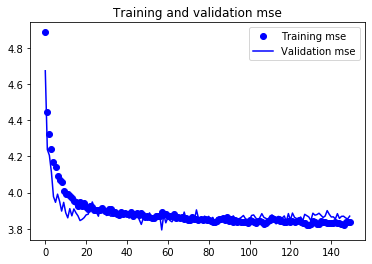

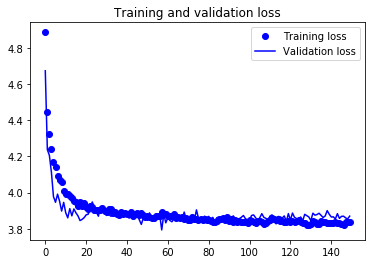

In [25]:
# accuracy = model_train.history['acc']
# val_accuracy = model_train.history['val_acc']
# loss = model_train.history['loss']
# val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training mse')
plt.plot(epochs, val_accuracy, 'b', label='Validation mse')
plt.title('Training and validation mse')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig(workdir + '//EC11K_ResNet_mse_loss_plot.png')
plt.show()

In [26]:
predicted_classes = model.predict(test_X)

In [27]:
predicted_value = predicted_classes

In [28]:
# saving predicted ln(IC50)s and ln(IC50)s in the test set
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]
c.to_csv(workdir + '//200915_EC11K_ResNet_pred_and_val_result.csv', index=False)


In [29]:
# result table
c.head()

,Predicted,Test
0,0.321528,-0.940726
1,1.206293,2.079442
2,0.681042,2.079442
3,0.654309,2.079442
4,0.784352,2.079442


In [30]:
predicted_value.shape

(1136, 1)

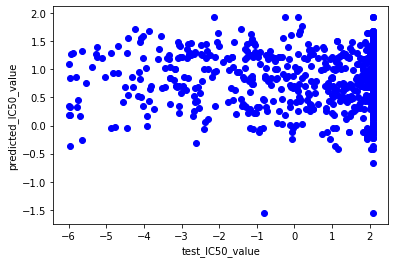

In [31]:
plt.scatter(test_label_array,predicted_value,c='blue')
plt.xlabel('test_IC50_value')
plt.ylabel('predicted_IC50_value')
plt.savefig(workdir + '//EC11K_ResNet_test_scatterplot.png')

In [32]:
# R-squared value
from sklearn.metrics import r2_score
r2_value = r2_score(b,a)
print(r2_value)

-0.03317667071518904


In [33]:
# Linear regression value (slope)
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.014040912154424738, intercept=0.858176148920202, rvalue=0.05815323204777348, pvalue=0.050050516195294, stderr=0.007157796470941147)

In [34]:
# RMSE
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 1.9671732888880238
